## SIR Model

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [19]:
# Define the SIR model differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [20]:
# Initial conditions: 1000 susceptible, 1 infected, 0 recovered
S0 = 999
I0 = 1
R0 = 0
y0 = [S0, I0, R0]

# Time points (in days)
t = np.linspace(0, 160, 160)

# Parameters: transmission rate (beta), recovery rate (gamma)
beta = 0.3
gamma = 0.1

# Solve the ODEs
solution = odeint(sir_model, y0, t, args=(beta, gamma))

# Extract the solution
S, I, R = solution.T

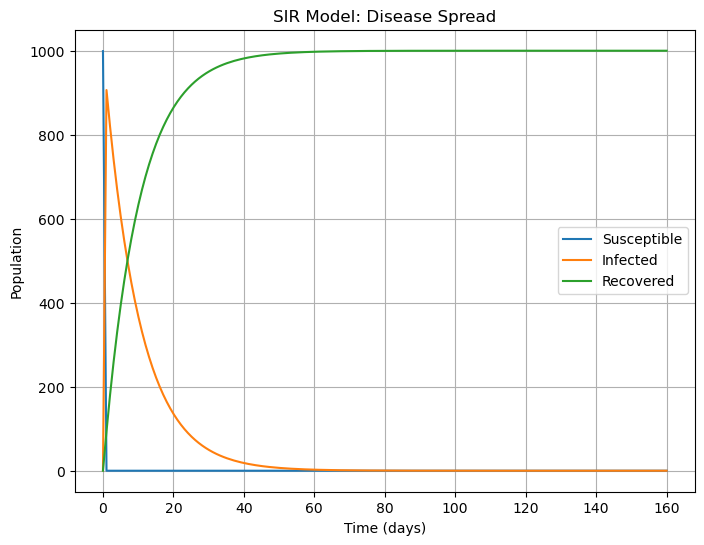

In [21]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infected")
plt.plot(t, R, label="Recovered")
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SIR Model: Disease Spread')
plt.grid(True)
#plt.show()
plt.savefig('SIR_model_figure.jpg')

## Parameter Estimation

In [22]:
from scipy.optimize import curve_fit
# Generate synthetic data (e.g., from a real-world scenario)
synthetic_infected = I + np.random.normal(0, 0.3, size=len(I))

# Define a function to fit the model to the data
def fit_sir_model(t, beta, gamma, S0, I0, R0):
    y0 = [S0, I0, R0]
    solution = odeint(sir_model, y0, t, args=(beta, gamma))
    return solution[:, 1]  # Return infected population

In [23]:
# Fit the model to the synthetic infected data ( Here one can put real data)
popt, pcov = curve_fit(fit_sir_model, t, synthetic_infected, p0=[0.3, 0.1, 999, 1, 0])
# Extract estimated parameters
beta_est, gamma_est, S0_est, I0_est, R0_est = popt

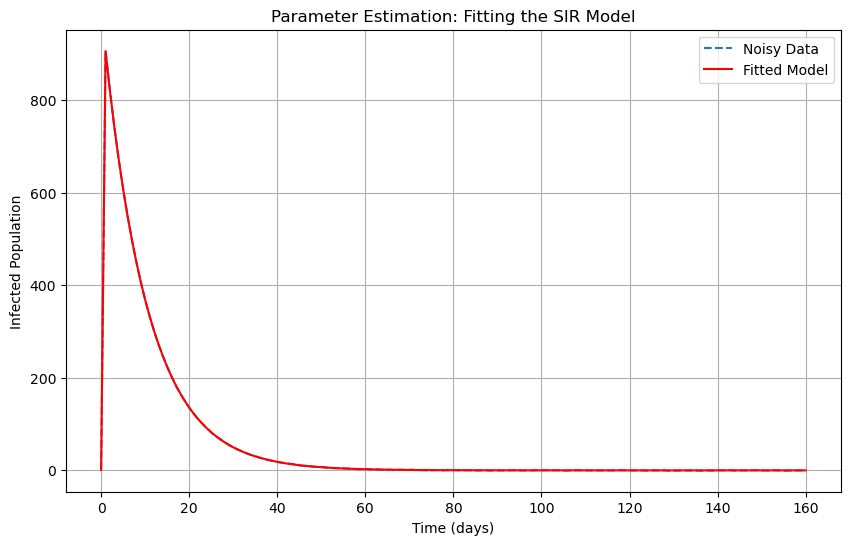

In [24]:
# Plot the fitted model against the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(t, synthetic_infected, label="Noisy Data", linestyle='dashed')
plt.plot(t, fit_sir_model(t, *popt), label="Fitted Model", color='red')
plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.legend()
plt.title('Parameter Estimation: Fitting the SIR Model')
plt.grid(True)
#plt.show()
plt.savefig('SIR_model_parameter_estimation_figure.jpg')

## Sensitivity Analysis

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Define the SIR model differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [26]:
# Initial conditions: 1000 susceptible, 1 infected, 0 recovered
S0 = 999
I0 = 1
R0 = 0
y0 = [S0, I0, R0]

# Time points (in days)
t = np.linspace(0, 160, 160)

# Sensitivity analysis: vary beta and gamma
betas = np.linspace(0.1, 0.9, 20)  # Increased resolution for beta
gammas = np.linspace(0.05, 0.3, 20)  # Increased resolution for gamma
peak_infections = []

# Run simulations for each combination of beta and gamma
for beta in betas:
    for gamma in gammas:
        solution = odeint(sir_model, y0, t, args=(beta, gamma))
        I = solution[:, 1]  # Extract infected compartment
        peak_infections.append((beta, gamma, max(I)))  # Record peak infection

# Convert the results to a numpy array for easy manipulation
peak_infections = np.array(peak_infections)

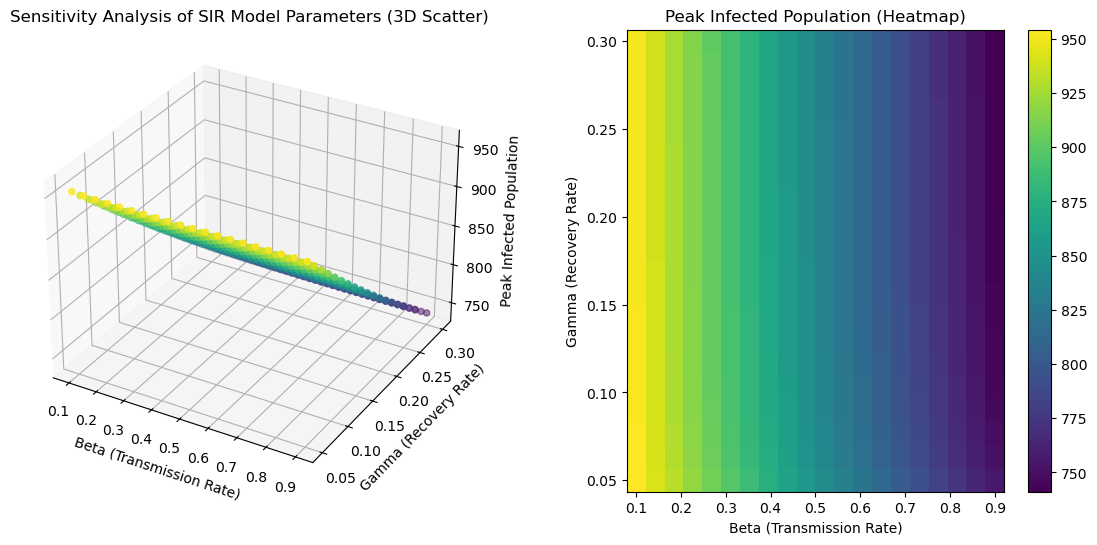

In [27]:
# Plot Sensitivity Analysis Results
fig = plt.figure(figsize=(14, 6))  # Increase figure width for more space between subplots

# 1. 3D Scatter Plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(peak_infections[:, 0], peak_infections[:, 1], peak_infections[:, 2], c=peak_infections[:, 2], cmap='viridis')
ax.set_xlabel('Beta (Transmission Rate)')
ax.set_ylabel('Gamma (Recovery Rate)')
ax.set_zlabel('Peak Infected Population')
ax.set_title('Sensitivity Analysis of SIR Model Parameters (3D Scatter)')

# 2. Heatmap (2D)
# Reshape the peak_infections into a grid for heatmap plotting
beta_grid, gamma_grid = np.meshgrid(betas, gammas)
peak_grid = peak_infections[:, 2].reshape(len(gammas), len(betas))

# 2D Heatmap
ax2 = fig.add_subplot(122)
c = ax2.pcolormesh(beta_grid, gamma_grid, peak_grid, shading='auto', cmap='viridis')
fig.colorbar(c, ax=ax2)
ax2.set_xlabel('Beta (Transmission Rate)')
ax2.set_ylabel('Gamma (Recovery Rate)')
ax2.set_title('Peak Infected Population (Heatmap)')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.3)  # Increase horizontal space between subplots

# Display the figure
#plt.show()
plt.savefig('SIR_model_parameter_sensitivity_analysis.jpg')